<a id='top'></a>

# CSCI3022 S21
# Homework 5: Testing and Confidence
***

**Name**:Yixiao Lei

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [15 points] Problem 1 - Time and Testing 

The flowers bloomed early this year in Kyoto, Japan (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

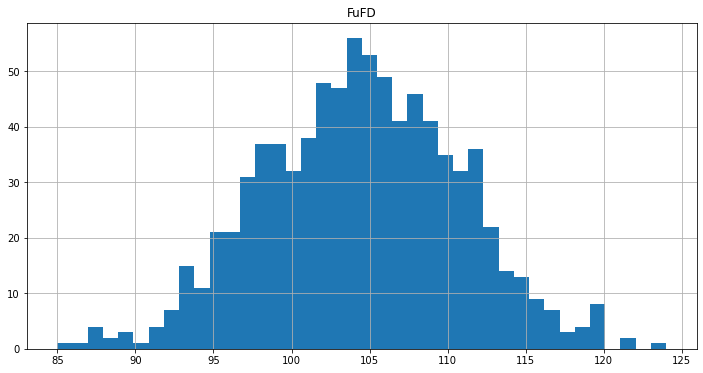

In [2]:
df=pd.read_csv('kyotoflowers.csv', encoding='UTF-8')
df.columns =['Year', 'FuFD']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df.hist(column='FuFD',bins=40, ax=ax);

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

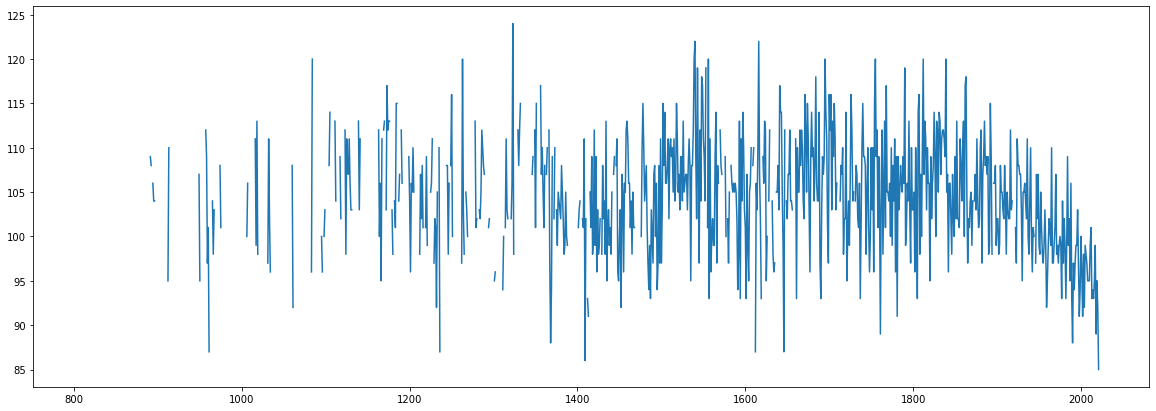

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,7))
plt.plot(df['Year'], df['FuFD'])
plt.show()


**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [4]:
minval = df['FuFD'].min() 
maxval = df['FuFD'].max() 
Q1 = df['FuFD'].quantile(.25) 
Q2 = df['FuFD'].quantile(.50) 
Q3 = df['FuFD'].quantile(.75) 
print("5-Number Summary: {:.2f}    {:.2f}    {:.2f}    {:.2f}    {:.2f}".format(minval, Q1, Q2, Q3, maxval))

5-Number Summary: 85.00    100.00    104.00    109.00    124.00


**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?  One way to do this might be to generate confidence intervals comparing e.g. the last $n$ years of data to all the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of take, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior all-observed years.

Write a sentence interpreting this result.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in any variance/confidence/etc. calculations.

In [13]:
dfv=pd.DataFrame(df.iloc[-12:,:].values)

n=len(dfv)
m=np.mean(df['FuFD'])
dfv.columns =['Year', 'FuFD']
xbar=np.mean(dfv['FuFD'])
svar=np.var(dfv['FuFD'],ddof=1)
a=np.sqrt(svar)/np.sqrt(n)

c=stats.norm.ppf(1-0.01/2)

dfc=pd.DataFrame(df.iloc[0:-12].values)
mn=len(dfc)

dfc.columns =['Year', 'FuFD']
mean=np.mean(dfc['FuFD'])
xbar2=np.mean(dfc['FuFD'])
svar2=np.var(dfc['FuFD'],ddof=1)
dm=xbar2-xbar
var=np.sqrt(svar/n+svar2/mn)
z=dm/(var)

print("For a CI of: ", dm-(c*var),   dm+(c*var), "we reject the hypothesis the mean from this interval is not the same as the mean for the prior all-observed years ")

For a CI of:  7.12638701259924 13.748562236284227 we reject the hypothesis the mean from this interval is not the same as the mean for the prior all-observed years 


**Part E**: Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

the full flowering data doesn't reflect the presence of global warming, we may sould use P-values to measure extremeness. we can calculate probability of the smaller full flowering data. if there is a high probability, we can conclude the presence of global warning.

**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years in the data set, starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of every starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1629 to 2010-2021 contains zero, then print `1618`.  Report:
- The earliest date of such an interval contianing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [6]:
a=799
b=811
dfl=pd.DataFrame(df.iloc[-12:,:].values)
dfl.columns =['Year', 'FuFD']
xbar2=np.mean(dfl['FuFD'])
svar2=np.sqrt(np.var(dfl['FuFD'],ddof=1))
m=len(dfl)
answer=[]
while b<=1230:
    dfk=pd.DataFrame(df.iloc[a:b].values)
    n=len(dfk)
    dfk.columns =['Year', 'FuFD']
    xbar=np.sum(dfk['FuFD'])/n
    svar=np.sqrt(np.var(dfk['FuFD'],ddof=1))
    critz=stats.norm.ppf(1-0.01/2)
    dm=xbar2-xbar
    var=np.sqrt(svar+svar2)
    print('The CI is: ', dm-(c*var),   dm+(c*var))
    if dm-(c*var)<0 and dm+(c*var)>0 :
        answer.append(a+801)

    a=a+12
    b=b+12


print(answer)



The CI is:  -0.3477656079972071 16.347765607997207
The CI is:  -11.89833297651711 7.2316663098504534
The CI is:  9.159683099691327 26.173650233642014
The CI is:  -12.477986339028673 5.977986339028673
The CI is:  7.848470326819454 21.98486300651389
The CI is:  -21.496433668717618 -4.8368996646156965
The CI is:  -21.86230080668362 -5.804365859983035
The CI is:  -21.851744409074275 -3.8149222575923822
The CI is:  -24.069786174465236 -7.263547158868079
The CI is:  8.509046625034053 23.157620041632633
The CI is:  -10.899641314996652 6.066307981663337
The CI is:  -19.775178502035132 -3.391488164631525
The CI is:  -20.134807896333918 -2.1985254369993967
The CI is:  -19.444617473377868 -2.055382526622134
The CI is:  -19.437539302458894 -3.0624606975411073
The CI is:  -20.142786095599437 -3.0238805710672203
The CI is:  -18.01118800429877 -2.1554786623678863
The CI is:  -22.62346651436024 -4.543200152306417
The CI is:  -19.429418505878655 -3.5705814941213463
The CI is:  -24.763773451602095 -10.0

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (5 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


From the article, they misunderstand the P Value as the probability of the hypothesis success. and make scientific conclusion base on whether the P value exceeds a certain number. I think lowering the threshold is a good idea. because P value is a tool to measure extrameness under null hypothesis is true, lower threshold means the stronger evidence to reject null hypothesis. we should not use P value along to made any scientific conclusion.

#### 2B  (2 pts):
In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?   Use **plain English**.

95 %confidence interval means 95% of random samples of population will yield CIs that contain the true mean
so 99% confidence interval is wider than 95% confidence interval


#### 2C (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

 Type I error means the strength of the carbon is below tolerance but we think it is safe.
 Type II error means the strength of the carbon is safe but we think it is Unsafe.
 I would rather to have a low  Type I error 

#### 2D (2pts):

Let $X_1, X_2, \dots X_n$ be independent and identically distributed sample from a normal random variable $N(\mu,1)$.


As you've seen, A 95% confidence interval for $\mu$ is $\bar{x} \pm 1.96 \cdot \frac{1}{\sqrt{n}}$.

Let $p$ denote the probability that an *additional* (or new) independent observation falls within this confidence interval. Is $p$ greater than, less than, or equal to 0.95? Justify your answer with both intuition and a formal mathematical statement.

zstart= $\frac{\bar{x}-\mu}{\frac{1}{\sqrt{n}}}$.zstart is smaller than this confidence interval. so P should be greater than 0.95

#### 2E (2pts):
Suppose that 14 people in a sample of 91 are found to be smokers. Calculate the 90% confidence interval
for the *true* proportion of smokers in the population from which this sample originated. Interpret this interval in a plain English sentence.

$p$=$\frac{2}{13}$

A 90% confidence interval for population $p$ is $p \pm 1.64 \cdot \frac{{2/13}\cdot{11/13}}{\sqrt{n}}$.

#### 2F (2pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7400
meters. Inspecting their study and the descriptions of their 64 measurements, it is reasonable to assume that the data were iid.  Their measurements contained sample statistics in $\mu s$ (or $\frac{sec}{10^6}$) of **mean** $\bar{X}=27.75$ and **standard deviation** of $s = 5.08.$


Construct an approximate 95% confidence interval for the time light takes to travel 7400 meters.

A 95% confidence interval for $\mu$ is $27.75 \pm 1.96 \cdot \frac{5.08}{\sqrt{7400}}$.
from 27.63 to 27.86

---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3 - Nap time?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [7]:
t=stats.norm.ppf(1-0.025/2)
print('The CI for Coffee+Nap is: ', 451.3-t*31.9/np.sqrt(15),   451.3+t*31.9/np.sqrt(15))
print('The CI for Coffee is: ', 494.2-t*39.6/np.sqrt(15),   494.2+t*39.6/np.sqrt(15))
print('The CI for Nap is: ', 492.8-t*45.2/np.sqrt(15),   492.8+t*45.2/np.sqrt(15))

The CI for Coffee+Nap is:  432.838586505771 469.76141349422903
The CI for Coffee is:  471.2823832485433 517.1176167514567
The CI for Nap is:  466.6415081523777 518.9584918476223


1. I think we can conclude Coffee+Nap has faster reaction time than Coffee and Nap, but we can not compare Coffee to Nap.
2. we use t-distribution because the dataset is normally distributed and the sample size is small.


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [8]:
xbar=494.2-492.8

se=np.sqrt(((39.6**2)/15) +((45.2**2)/15))
t=xbar/se
critz=stats.norm.ppf(1-0.025)
pvalue1=stats.t.cdf(t,30-2)
print(t,critz)

0.09022936362055636 1.959963984540054


Null hypothesis: The reaction time between Coffee and Nap are the same
alternative hypothesis: the Coffee react time faster than the Nap .
I use xbar represent the Coffee - Nap mean.
The t value is close to 0. so we can not figure out which one has faster reaction times. 


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [9]:
xbar=492.8-451.3

se=np.sqrt(((39.6**2)/15) +((31.9**2)/15))
t=xbar/se
critz=stats.norm.ppf(1-0.025)
pvalue2=stats.t.cdf(t,30-2)
print(t,critz)

3.160812833534076 1.959963984540054


Null hypothesis: The reaction time between Coffee+Nap and Coffee are the same
alternative hypothesis: the Coffee+Nap react time faster than the Coffee .
The t of Coffee time minus Coffee+Nap is bigger than the t(alpha). 
So the the react time of Coffee is bigger than the Coffee+Nap.
So the Coffee+Nap has faster react time

In [10]:
xbar=494.2-451.3

se=np.sqrt(((45.2**2)/15) +((31.9**2)/15))
t=xbar/se
critz=stats.norm.ppf(1-0.025)
pvalue3=stats.t.cdf(t,30-2)
print(t,critz)

3.003281821166948 1.959963984540054


Null hypothesis: The reaction time between Coffee+Nap and Nap are the same
alternative hypothesis: the Coffee+Nap react time faster than the Nap .
The t of Nap time minus Coffee+Nap is bigger than the t(alpha). 
So the the react time of Nap is bigger than the Coffee+Nap.
So the Coffee+Nap has faster react time

**Part D**: Generally speaking, we ust $\alpha$ to denote the "probability of error if the null hypothesis is true."  In parts B-C, we performed three hypothesis tests.  Suppost that each of these tests is **independent**, with underlying Probability of type I error of $\alpha=0.025$.  What's the probability that we committed *at least one* Type I error over those 3 tests?  Why might this be important?

In [15]:
print(pvalue1,pvalue2,pvalue3)
p=(1-(1-0.025)*(1-0.025)*(1-0.025))
print(p)

0.5356263404952936 0.9981203302874997 0.9972140168716945
0.07314062500000007
